## Determine the signal strength or quality using Neural Networks


**• DOMAIN:** Electronics and Telecommunication
.

**• OBJECTIVE**:

To build a regressor to determine the signal strength or quality.

**• DATA DESCRIPTION:**

The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality


 **• Steps and tasks::**
1. Import data.
2. Data analysis & visualisation
  * Perform relevant and detailed statistical analysis on the data.
3. Design, train, tune and test a neural network regressor.
4. Pickle the model for future use.

# **Import Libraries**

In [ ]:
# Import all the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**• Import all the given datasets and explore shape and size of each.**

In [ ]:
#Import Dataset

df1 = pd.read_csv('./Signal.csv')


In [ ]:
Signal_df = df1.copy(deep=True)

**Check dimension and datatypes of all the columns of the datasets**

In [ ]:
# Check the dimensions of final dataset
print(f" Shape of the dataframe = {Signal_df.shape}")

 Shape of the dataframe = (1599, 12)


In [ ]:
# Checking attributes of the dataset
Signal_df.info()
Signal_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.   The dataset has **11 features** namely Parameter 1 throughParameter 11 and one **target nariable as "Signal_Strength".**
2.   There are 1599 rows in the dataset.

3. All the feature variables are of float type and the target variable is of int type.

4. The feature values are in various ranges such as 0.04 in Parameter 3 while 289 in Parameter 7. (Normalization is required)

# **2. Data analysis & visualisation:**

• Perform relevant and detailed statistical analysis on the data.

•  Perform relevant and detailed uni, bi and multi variate analysis.

Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if
required. Be highly experimental and analytical here to find relevant hidden patterns.



**Checking for null values in the dataset.**

In [ ]:
Signal_df.isnull().sum().sum()

0

There are no NULL values in the dataset.

In [ ]:
Signal_df.isnull().any().any()

False

**Describe function generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.**

This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns

In [ ]:
# Let's check the five point summary of each feature in the dataset.
Signal_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


It is observed that in the columns Parameter 4, 6 and 7 there are significant outliers.

The outliers can be treated after statistical data analysis.


# **Univariate analysis**

Text(0.5, 1.0, 'Signal_')

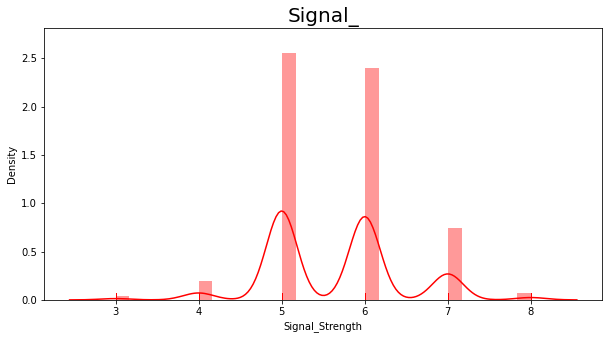

In [ ]:
from IPython.core.pylabtools import figsize
# Check distribution of target variable

figsize(10,5)
sns.distplot(Signal_df['Signal_Strength'], rug=True, color='red')
plt.title('Signal_', fontsize = 20)

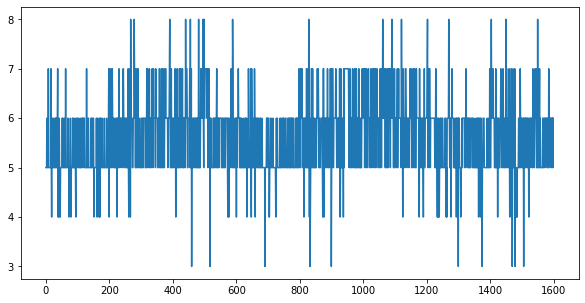

In [ ]:
plt.plot(Signal_df['Signal_Strength'])
plt.show()

### **Let's check distribution of the some features (Parameters)**

**Observe the distribution of four random parameters**

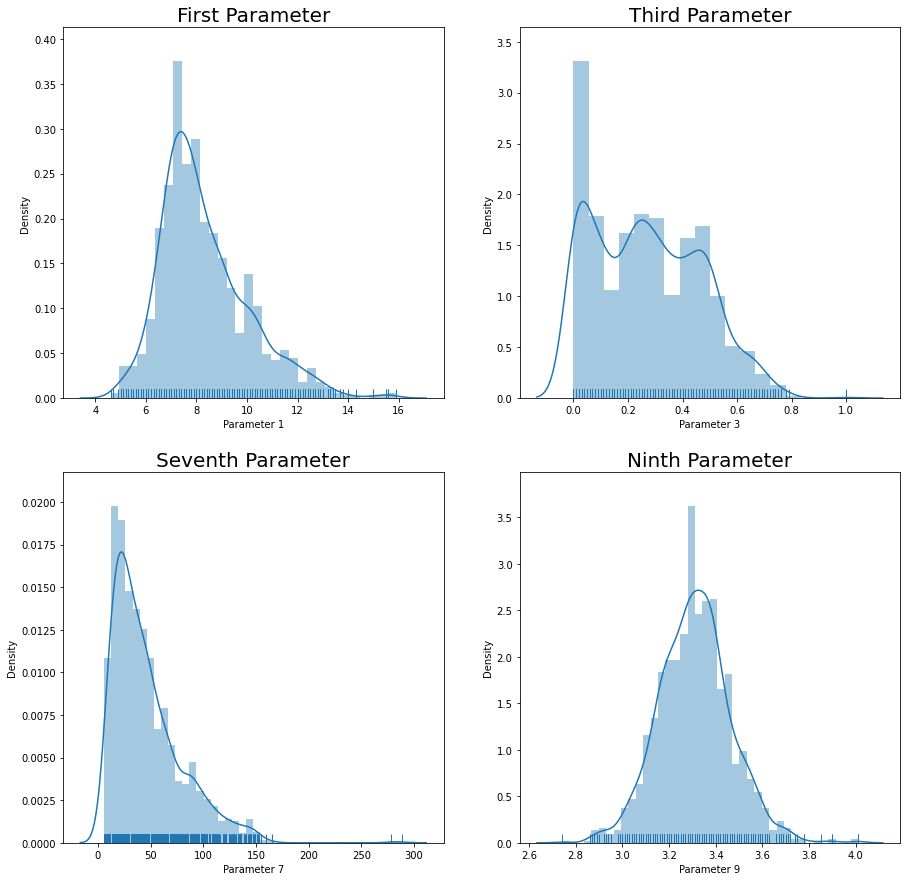

In [ ]:
fig = plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
sns.distplot(Signal_df['Parameter 1'], hist=True, rug=True)
plt.title('First Parameter', fontsize = 20)

plt.subplot(2, 2, 2)
sns.distplot(Signal_df['Parameter 3'], hist=True, rug=True)
plt.title('Third Parameter', fontsize = 20)

plt.subplot(2, 2, 3)
sns.distplot(Signal_df['Parameter 7'], hist=True, rug=True)
plt.title('Seventh Parameter', fontsize = 20)

plt.subplot(2, 2, 4)
sns.distplot(Signal_df['Parameter 9'], hist=True, rug=True)
plt.title('Ninth Parameter', fontsize = 20)

plt.show()


# **Multivariate Analysis**

**Perform Correlation analysis with Insights.**

In [ ]:
#Observe the association of each independent variable with target variable
# and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

corr = Signal_df.corr()
corr

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Parameter 2,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Parameter 3,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Parameter 4,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Parameter 5,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Parameter 6,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Parameter 7,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Parameter 8,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
Parameter 9,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Parameter 10,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


**Pearson's Correlation Coefficient:** helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

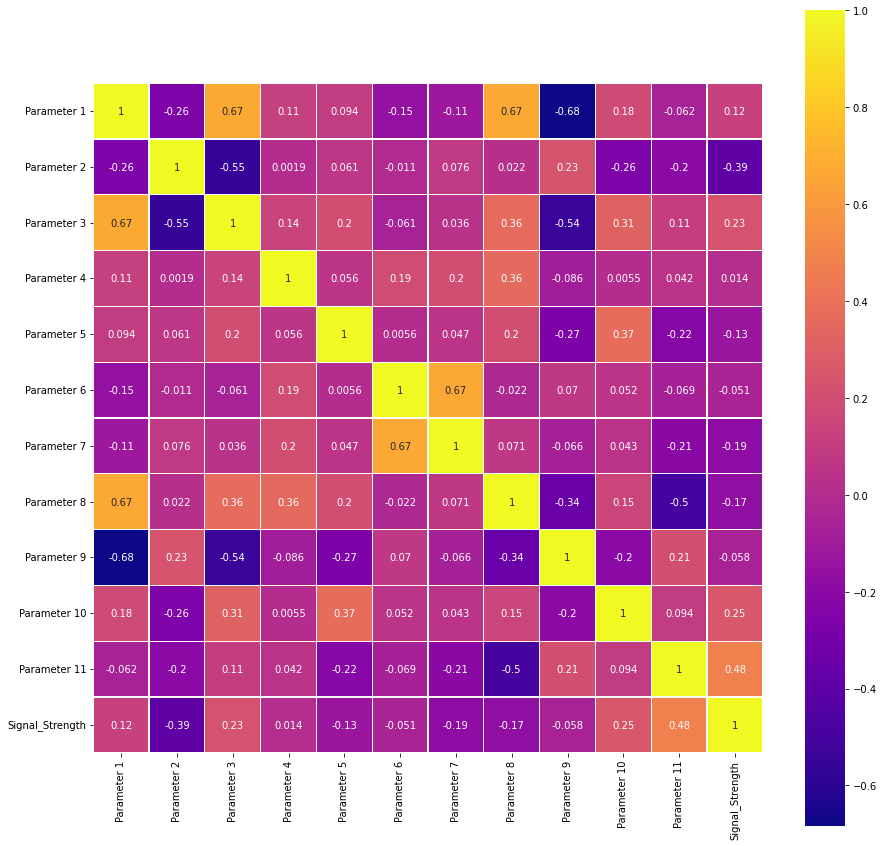

In [ ]:
# Plot the correlation between each feature using seaborn heatmap function.
colormap = plt.cm.plasma
#colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
sns.heatmap(corr,square=True, cmap=colormap, linecolor='white',linewidths=0.2, annot=True)

**No strong correlation exist between any two parameters**

The correlation between Parameter 1 and 3 is highest i.e. 0.67 as per the heatmap. But this is not a significant value hence we can say no two features are highly correlated.

## **Treating Outliers**

###**Working with Outliers to preapare the data for Model building.**

###Removing outliers by replacing the data below lower whisker with it and above upper whisker with it respectively.

In [ ]:
# Get outliers from each independent variable
# and replace it with minimum value for outliers below lower quartile
# and with maximum value for outliers above upper quartile.

S_Parameters = Signal_df.iloc[:,:11]
columns= list(S_Parameters.columns)
for i in columns:
    #getting upper and lower quartile values

    Quartile25,Quartile75 = np.percentile(Signal_df[i],25),np.percentile(Signal_df[i],75)

    IQR = Quartile75 - Quartile25

    Threshold = IQR * 1.5

    lower = Quartile25 - Threshold
    upper= Quartile75 + Threshold

    outliers_low = [j for j in Signal_df[i] if j < lower]
    outliers_high= [j for j in Signal_df[i] if j > upper]

    print ("25th Quantile value: ", Quartile25)
    print('Total Number of outliers low count in {}  : {}'.format(i,len(outliers_low)))
    print('List of Low outliers: ')
    print(outliers_low)
    Signal_df[i]=np.where(Signal_df[i]>upper,Quartile25,Signal_df[i])
    print('Total Number of outliers in {} After Imputing : {}'.format(i,len(outliers_low)))

    print ("75th Quantile value: ", Quartile75)
    print('Total Number of outliers high count in {}  : {}'.format(i,len(outliers_high)))
    print('List of High outliers: ')
    print(outliers_high)
    Signal_df[i]=np.where(Signal_df[i]>upper,Quartile75,Signal_df[i])
    print('Total Number of outliers in {} After Imputing : {}'.format(i,len(outliers_high)))
    print('\n')

25th Quantile value:  7.1
Total Number of outliers low count in Parameter 1  : 0
List of Low outliers: 
[]
Total Number of outliers in Parameter 1 After Imputing : 0
75th Quantile value:  9.2
Total Number of outliers high count in Parameter 1  : 49
List of High outliers: 
[12.8, 12.8, 15.0, 15.0, 12.5, 13.3, 13.4, 12.4, 12.5, 13.8, 13.5, 12.6, 12.5, 12.8, 12.8, 14.0, 13.7, 13.7, 12.7, 12.5, 12.8, 12.6, 15.6, 12.5, 13.0, 12.5, 13.3, 12.4, 12.5, 12.9, 14.3, 12.4, 15.5, 15.5, 15.6, 13.0, 12.7, 13.0, 12.7, 12.4, 12.7, 13.2, 13.2, 13.2, 15.9, 13.3, 12.9, 12.6, 12.6]
Total Number of outliers in Parameter 1 After Imputing : 49


25th Quantile value:  0.39
Total Number of outliers low count in Parameter 2  : 0
List of Low outliers: 
[]
Total Number of outliers in Parameter 2 After Imputing : 0
75th Quantile value:  0.64
Total Number of outliers high count in Parameter 2  : 19
List of High outliers: 
[1.13, 1.02, 1.07, 1.33, 1.33, 1.04, 1.09, 1.04, 1.24, 1.185, 1.02, 1.035, 1.025, 1.115, 1.02, 

In [ ]:
Signal_df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **Data pre-processing:**

• Segregate predictors vs target attributes

• Perform train-test split and standardise the data or vice versa if required.

**Segregate predictors vs target attributes**

In [ ]:
# Initialize the random number generator
import random
seed = 7
np.random.seed(seed)

In [ ]:
TargetVariable=['Signal_Strength']
Predictors=['Parameter 1','Parameter 2','Parameter 3','Parameter 4','Parameter 5','Parameter 6','Parameter 7','Parameter 8','Parameter 9','Parameter 10','Parameter 11']

X=Signal_df[Predictors].values
y=Signal_df[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1119, 11)
(1119, 1)
(480, 11)
(480, 1)


### **Regression with TensorFlow**
Firstly, let's select TensorFlow version 2.x in colab

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.7.0'

# **5. Model training, testing and tuning:**

### Build the model
- The Sequential model is a linear stack of layers.
- The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape.
- You can also simply add layers via the .add() method

• Pickle the selected model for future use.

• Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results.



*   **We can create Keras models and evaluate them with scikit-learn by using handy wrapper objects provided by the Keras library.**
*   **This is desirable, because scikit-learn excels at evaluating models and will allow us to use powerful data preparation and model evaluation schemes with very few lines of code.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

### **Compile and Fit the model**
Here we configure the model for training

After evaluating the performance by using ADAM optimizer, The efficient SGD optimization algorithm is used and a mean squared error loss function is optimized.

This will be the same metric that we will use to evaluate the performance of the model.

It is a desirable metric because by taking the square root gives us an error value we can directly understand in the context of the problem

In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=13, input_dim=11, kernel_initializer='he_normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='he_normal', activation='relu'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='he_normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train,batch_size = 10, epochs = 150,verbose=1)

Epoch 1/150
112/112 [==============================] - 1s 2ms/step - loss: 2.7230
Epoch 2/150
112/112 [==============================] - 0s 2ms/step - loss: 1.1926
Epoch 3/150
112/112 [==============================] - 0s 2ms/step - loss: 0.9994
Epoch 4/150
112/112 [==============================] - 0s 2ms/step - loss: 0.9341
Epoch 5/150
112/112 [==============================] - 0s 2ms/step - loss: 0.8825
Epoch 6/150
112/112 [==============================] - 0s 2ms/step - loss: 0.8321
Epoch 7/150
112/112 [==============================] - 0s 2ms/step - loss: 0.7862
Epoch 8/150
112/112 [==============================] - 0s 2ms/step - loss: 0.7515
Epoch 9/150
112/112 [==============================] - 0s 2ms/step - loss: 0.7269
Epoch 10/150
112/112 [==============================] - 0s 2ms/step - loss: 0.7084
Epoch 11/150
112/112 [==============================] - 0s 2ms/step - loss: 0.6954
Epoch 12/150
112/112 [==============================] - 0s 2ms/step - loss: 0.6838
Epoch 13/150


Below we define the function to create the baseline model to be evaluated. It is a simple model that has a single fully connected hidden layer with the same number of neurons as input attributes (11).

The network uses good practices such as the rectifier activation function for the hidden layer.

No activation function is used for the output layer because it is a regression problem and we are interested in predicting numerical values directly without transform.

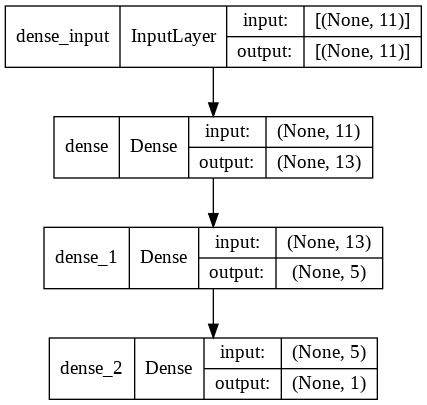

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
X_test

array([[-0.24153724,  0.26156547, -0.98179605, ..., -0.43995207,
         0.26905795, -0.76833766],
       [-0.17058041, -0.10413828, -0.51772764, ...,  0.59519119,
        -1.29412855, -0.86810125],
       [ 1.88716779,  0.93202235, -0.25991185, ..., -0.16391387,
        -0.68622269, -0.46904691],
       ...,
       [-0.95110558, -0.34794078, -0.15678554, ...,  0.59519119,
        -0.25200422,  0.22929819],
       [ 1.74525412, -0.04318765,  1.90574076, ..., -1.47509532,
         0.26905795,  1.42646121],
       [ 1.31951311, -0.10413828, -0.15678554, ...,  0.25014344,
        -0.94675377, -0.36928332]])

In [ ]:
y_predict=model.predict(X_test)
for i in range(10):
	print("X=%s, Predicted=%s" % (X_test[i], y_predict[i]))

X=[-0.88612159 -0.29494842 -0.98179605  0.10878126 -0.9339259   0.32241287
 -0.15830172 -0.63396857 -0.02589477  0.14002579 -0.77159979], Predicted=[-0.64023685]
X=[ 1.77886816 -0.7162818   0.71978814  0.10878126  0.40696259 -0.87272305
 -0.93589293  0.99582689 -1.54410487  0.30699167 -1.06568951], Predicted=[-0.09846811]
X=[-0.68624736 -1.49875807  1.69948813 -0.12129973 -0.26348166  0.21376415
 -0.63966771  0.84817992  0.52618164  0.72440635  0.20869927], Predicted=[0.8017334]
X=[-0.21987415  0.42733737 -0.46616448  0.33886225 -0.12939281  0.21376415
  0.43414872  0.48474121  0.87122939 -0.36087184 -0.37948017], Predicted=[-0.05071514]
X=[-0.61962262  0.60790882 -1.34273815  0.33886225 -0.86688148 -0.76407433
  0.1379235  -1.88896786  0.11212434 -1.02873534  1.38505816], Predicted=[0.57305276]
X=[-0.61962262  0.06619447 -0.72398027 -0.35138072 -1.33619245  0.32241287
 -0.75075217 -0.52039397 -0.64698072  0.3904746  -0.47751007], Predicted=[-0.9901471]
X=[-1.81886801  0.36714689 -0.98

In [ ]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):

    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20, 50]
    epoch_list  =   [5, 10, 50, 100, 150]

    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])

    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))

            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)

            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 78.06828013583679
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 70.22032528315749
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 67.98271719992297
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 66.54653966668378
5 Parameters: batch_size: 5 - epochs: 150 Accuracy: 67.37628125008433
6 Parameters: batch_size: 10 - epochs: 5 Accuracy: 87.35966642926881
7 Parameters: batch_size: 10 - epochs: 10 Accuracy: 72.26280303258088
8 Parameters: batch_size: 10 - epochs: 50 Accuracy: 66.27125556557982
9 Parameters: batch_size: 10 - epochs: 100 Accuracy: 67.14791047330878
10 Parameters: batch_size: 10 - epochs: 150 Accuracy: 64.69471016306386
11 Parameters: batch_size: 15 - epochs: 5 Accuracy: 96.08914664746557
12 Parameters: batch_size: 15 - epochs: 10 Accuracy: 73.36007300706683
13 Parameters: batch_size: 15 - epochs: 50 Accuracy: 69.87768492437401
14 Parameters: batch_size: 15 - epochs: 100 Accuracy: 68.63187156664944
15 Parameters: bat

Hyperparameter trial results for ANN

## **Plotting the parameter trial results**

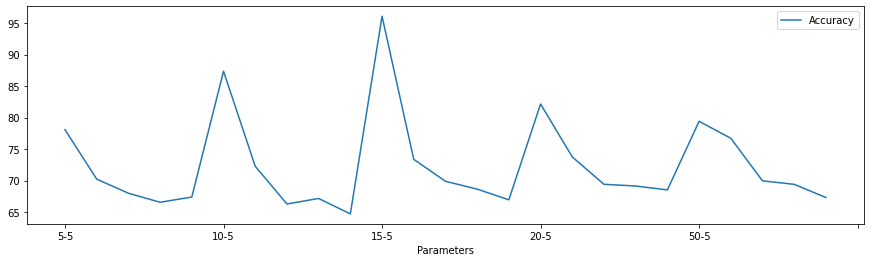

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

**Visualizing the results of parameter trials for ANN**

At batch_size=50 and epochs=05, there is pick showing model is overfitting.
This graph shows that the best set of parameters are **batch_size=10** and **epochs=10**. Next step is to train the model with these parameters.

### **Training the ANN model with the best parameters**
Using the best set of parameters found above, training the model again and predicting the prices on testing data.

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 10, epochs = 10, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Signal_Strength']=y_test_orig
TestingData['PredictedStrength']=Predictions
TestingData.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength,PredictedStrength
0,6.8,0.47,0.08,2.2,0.064,18.0,38.0,0.99553,3.30,0.65,9.6,6.0,5.089924
1,10.8,0.40,0.41,2.2,0.084,7.0,17.0,0.99840,3.08,0.67,9.3,6.0,5.464196
2,7.1,0.27,0.60,2.1,0.074,17.0,25.0,0.99814,3.38,0.72,10.6,6.0,6.258609
3,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0,5.0,5.593182
4,7.2,0.62,0.01,2.3,0.065,8.0,46.0,0.99332,3.32,0.51,11.8,6.0,6.109768


Finding the accuracy of the model.

Using the final trained model, now we are generating the prediction error for each row in testing data as the Absolute Percentage Error. Taking the average for all the rows is known as Mean Absolute Percentage Error(MAPE).

The accuracy is calculated as 100-MAPE.

In [ ]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Signal_Strength']-TestingData['PredictedStrength'])/TestingData['Signal_Strength'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 90.17324523710542


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength,PredictedStrength,APE
0,6.8,0.47,0.08,2.2,0.064,18.0,38.0,0.99553,3.30,0.65,9.6,6.0,5.089924,15.167936
1,10.8,0.40,0.41,2.2,0.084,7.0,17.0,0.99840,3.08,0.67,9.3,6.0,5.464196,8.930071
2,7.1,0.27,0.60,2.1,0.074,17.0,25.0,0.99814,3.38,0.72,10.6,6.0,6.258609,4.310147
3,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0,5.0,5.593182,11.863632
4,7.2,0.62,0.01,2.3,0.065,8.0,46.0,0.99332,3.32,0.51,11.8,6.0,6.109768,1.829465


**The Keras wrapper object for use in scikit-learn as a regression estimator is called KerasRegressor.**

We create an instance and pass it both the name of the function to create the neural network model as well as some parameters to pass along to the fit() function of the model later, such as the number of epochs and batch size.

Both of these are set to sensible defaults.

## **Finding best hyperparameters using GridSearchCV.**

Apart from the manual search method shown above, you can also use the Grid Search Cross-validation method present in the sklearn library to find the best parameters of ANN.

In [ ]:
# Function to generate Deep ANN model
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense

    model = Sequential()
    model.add(Dense(units=5, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

###########################################
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }

# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel,
                         param_grid=Parameter_Trials,
                         scoring=custom_Scoring,
                         cv=5)

#########################################
# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

print('### Printing Best parameters ###')
grid_search.best_params_

Epoch 1/10
128/128 [==============================] - 1s 2ms/step - loss: 1.0234
Epoch 2/10
128/128 [==============================] - 0s 2ms/step - loss: 0.8491
Epoch 3/10
128/128 [==============================] - 0s 2ms/step - loss: 0.6892
Epoch 4/10
128/128 [==============================] - 0s 2ms/step - loss: 0.6669
Epoch 5/10
128/128 [==============================] - 0s 2ms/step - loss: 0.6595
Epoch 6/10
128/128 [==============================] - 0s 2ms/step - loss: 0.6556
Epoch 7/10
128/128 [==============================] - 0s 2ms/step - loss: 0.6523
Epoch 8/10
128/128 [==============================] - 0s 2ms/step - loss: 0.6470
Epoch 9/10
128/128 [==============================] - 0s 2ms/step - loss: 0.6452
Epoch 10/10
128/128 [==============================] - 0s 2ms/step - loss: 0.6421
###################################################################### Accuracy: 81.61063631012402
Epoch 1/10
128/128 [==============================] - 1s 2ms/step - loss: 0.9797
Epoch 2/1

{'Optimizer_trial': 'rmsprop', 'batch_size': 20, 'epochs': 10}

**There is increase in accuracy after tuning the model with best hyper parameters.**

**• DOMAIN:** Autonomous Vehicles

**• CONTEXT:**

A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic
example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic
images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address
helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest
to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This
difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character
arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition
factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain
some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

**• DATA DESCRIPTION:**

The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained
from house numbers in Google Street View images Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The dataset has been provided in the form of h5py files


**• OBJECTIVE**:

We will build a digit classifier on the SVHN (Street View Housing Number) dataset

## **Steps and tasks:**

1. **Import data.**
2. **Data pre-processing and visualisation.**
3. **Design, train, tune and test a neural network image classifier.**
Hint: Use best approach to refine and tune the data or the model. Be highly experimental here to get the best accuracy out of the model.
4. **Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.**



**Import Dataset**

In [ ]:
import h5py

# Open the file as readonly

hdf = h5py.File("/content/drive/MyDrive/AIML-GL/NN and DL/NN PROJECT/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5",mode ='r')

In [ ]:
hdf.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [ ]:
# Load the training, test and validation se
X_train = hdf['X_train'][:]
y_train = hdf['y_train'][:]
X_test = hdf['X_test'][:]
y_test = hdf['y_test'][:]
X_val = hdf['X_val'][:]
y_val = hdf['y_val'][:]
# Close this file
hdf.close()

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42000, 32, 32)
y_train shape: (42000,)
X_test shape: (18000, 32, 32)
y_test shape: (18000,)


**Visualize the Dataset**

6   7   4   4   0   3   0   7   3   1   
0   1   3   1   1   0   0   8   4   6   
5   7   9   1   0   3   0   7   2   1   
1   0   2   9   0   2   5   1   3   2   
7   9   8   4   9   4   5   9   3   4   
0   5   5   8   3   6   6   0   0   6   
8   8   3   1   4   7   0   2   9   4   
8   7   3   9   4   4   3   3   4   4   
8   6   8   7   4   0   4   4   4   1   
4   2   7   4   2   9   1   9   1   0   


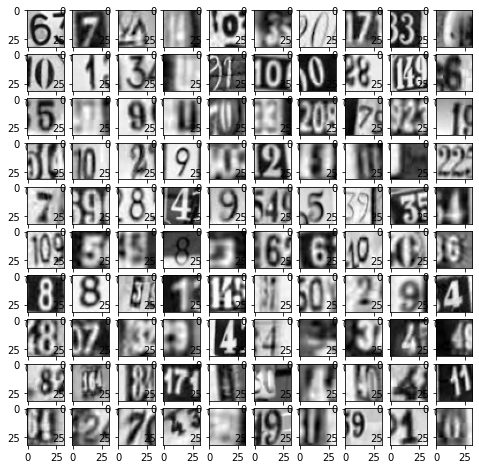

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

columns=10
rows=10

fig=plt.figure(figsize=(8, 8))

for i in range(1,columns*rows+1):
  img=X_train[i]
  fig.add_subplot(rows,columns,i)
  print(y_train[i],end='   ')
  if i % columns == 0:
    print ("")
  plt.imshow(img,cmap='gray')

plt.show()

Resize all the train and test inputs to 32 X 32

In [ ]:
# Importing OpenCV module for the resizing function
import cv2
import numpy as np

# Create a resized dataset for training and testing inputs with corresponding size
# Here we are resizing it to 32 X 32
X_train_resized=np.zeros((X_train.shape[0],32,32))
for i in range(X_train.shape[0]):
  #using cv2.resize to resize each train example to 32 X 32 size using Cubic interpolation
  X_train_resized[i,:,:]=cv2.resize(X_train[i],dsize=(32,32),interpolation=cv2.INTER_CUBIC)

X_test_resized = np.zeros((X_test.shape[0], 32, 32))
for i in range(X_test.shape[0]):
  #using cv2.resize to resize each test example to 32X32 size using Cubic interpolation
  X_test_resized[i,:,:] = cv2.resize(X_test[i], dsize=(32, 32), interpolation=cv2.INTER_CUBIC)


**Reshape train and test sets into compatible shapes**

. Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)

. n_e= number of examples, n_h = height, n_w = width, n_c = number of channels

.do not reshape labels



In [ ]:
X_train = X_train_resized.reshape(X_train_resized.shape[0], 32, 32, 1)
X_test = X_test_resized.reshape(X_test_resized.shape[0], 32, 32, 1)

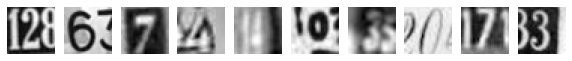

Image label: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('Image label: %s' % (y_train[0:10]))


Normalize data

    

*   we must normalize our data as it is always required in neural network models
*   we can achieve this by dividing the RGB codes with 255 (which is the maximum RGB code minus the minimum RGB code)

*   normalize X_train and X_test
*   make sure that the values are float so that we can get decimal points after division

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Print shape of data and number of images



*   print shape of X_train
*   print number of images in X_train
*   print number of images in X_test

In [ ]:
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

### **One-hot encode the class vector**


*   convert class vectors (integers) to binary class matrix convert y_train and y_test
*   number of classes: 10
*   we are doing this to use categorical_cross entropy as loss

In [ ]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

**Initialize a sequential model**

1.   define a sequential mode
2.   activation: "relu"
3.   input shape: (32, 32, 1) for first layer

        number of neurons in first layer: 1024
        number of neurons in last layer: number of classes
        activation function in first layer: relu
        activation function in last layer: softmax
        we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes(10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [ ]:
import time
sns.set_style('darkgrid')
%matplotlib inline

def evaluate(model, X_value, y_value, duration):

    results = model.evaluate(X_value, y_value)
    sns.set_style('darkgrid')
    print('Test accuracy: ', results[1])

    print("\n")
    print("TIME ELAPSED : ", duration)

    return results

### **MODEL 1**
### **Basic NN model**

Naive MLP model without any alterations

In [ ]:
# from now on, create a function to generate (return) models
def mlp_model1():

    model = Sequential()

    model.add(Dense(1024, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))
    model.add(Dense(512, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))
    model.add(Dense(256, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))
    model.add(Dense(150, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
model = mlp_model1()
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 50, epochs = 10, verbose = 1)
end =  time.time()
duration = end - start
result= evaluate(model,X_test,y_test,duration)

out = pd.DataFrame({'model': ['NN with sgd'], 'loss': [result[0]], 'accuracy': [result[1]]})


Epoch 1/10
840/840 [==============================] - 24s 27ms/step - loss: 2.3859 - accuracy: 0.1019 - val_loss: 2.3186 - val_accuracy: 0.1000
Epoch 2/10
840/840 [==============================] - 23s 27ms/step - loss: 2.3081 - accuracy: 0.1019 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 3/10
840/840 [==============================] - 23s 28ms/step - loss: 2.3031 - accuracy: 0.1019 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/10
840/840 [==============================] - 23s 27ms/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3027 - val_accuracy: 0.0998
Epoch 5/10
840/840 [==============================] - 23s 28ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
840/840 [==============================] - 23s 27ms/step - loss: 2.3027 - accuracy: 0.1020 - val_loss: 2.3027 - val_accuracy: 0.1001
Epoch 7/10
840/840 [==============================] - 23s 27ms/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3027 - val_accuracy:

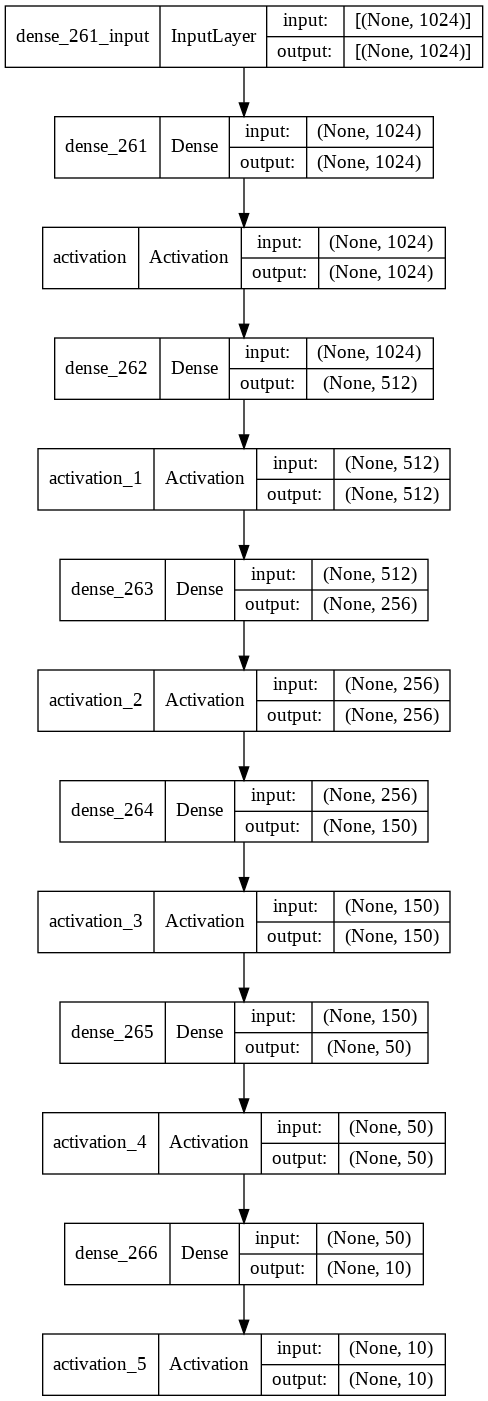

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

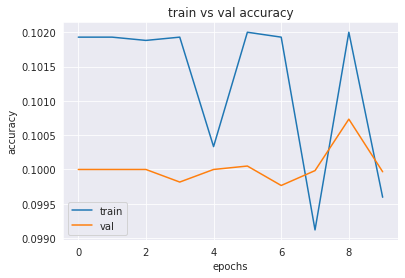

In [ ]:
plt.plot(history.history[ 'accuracy'])
plt.plot(history.history[ 'val_accuracy'])
plt.title( 'train vs val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend( ['train', 'val'])
plt.show()

**Model 1: The model performance is very poor with very less accuracy and more loss.**

## **MODEL 2**
## **1. Nonlinearity (Activation function)**

**Sigmoid functions suffer from gradient vanishing problem, making training slower**

There are many choices apart from sigmoid and tanh; try many of them!

'relu' (rectified linear unit) is one of the most popular ones

In [ ]:
def mlp_model2():
    model = Sequential()

    model.add(Dense(1024, input_shape = (1024, )))
    model.add(Activation('relu'))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(150))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
model = mlp_model2()
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 50,epochs = 10, verbose = 1)
end =  time.time()
duration = end - start
result=evaluate(model,X_test,y_test,duration)

out1 = pd.DataFrame({'model': ['NN with relu'], 'loss': [result[0]], 'accuracy': [result[1]]})

Epoch 1/10
840/840 [==============================] - 24s 28ms/step - loss: 2.3018 - accuracy: 0.1105 - val_loss: 17.9824 - val_accuracy: 0.1290
Epoch 2/10
840/840 [==============================] - 24s 29ms/step - loss: 2.2916 - accuracy: 0.1379 - val_loss: 24.7663 - val_accuracy: 0.1251
Epoch 3/10
840/840 [==============================] - 25s 30ms/step - loss: 2.2848 - accuracy: 0.1623 - val_loss: 17.4929 - val_accuracy: 0.1724
Epoch 4/10
840/840 [==============================] - 24s 28ms/step - loss: 2.2773 - accuracy: 0.1840 - val_loss: 17.4974 - val_accuracy: 0.1914
Epoch 5/10
840/840 [==============================] - 25s 29ms/step - loss: 2.2688 - accuracy: 0.2046 - val_loss: 18.3551 - val_accuracy: 0.2050
Epoch 6/10
840/840 [==============================] - 24s 28ms/step - loss: 2.2590 - accuracy: 0.2187 - val_loss: 19.8282 - val_accuracy: 0.2167
Epoch 7/10
840/840 [==============================] - 24s 28ms/step - loss: 2.2473 - accuracy: 0.2360 - val_loss: 22.3920 - val_ac

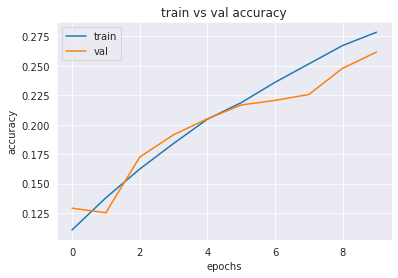

In [ ]:
plt.plot(history.history[ 'accuracy'])
plt.plot(history.history[ 'val_accuracy'])
plt.title( 'train vs val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend( ['train', 'val'])
plt.show()

### **MODEL 3**
## **2. Batch Normalizatio**n

Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

Normalize each mini-batch before nonlinearity

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [ ]:
def mlp_model3():
    model = Sequential()

    model.add(Dense(1024, input_shape = (1024, )))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(150))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
model = mlp_model3()
start = time.time()
history = model.fit(X_train, y_train,validation_data=(X_val,y_val),batch_size = 50, epochs = 10, verbose = 1)
end =  time.time()
duration = end - start
result = evaluate(model,X_test,y_test,duration)

out2 = pd.DataFrame({'model': ['NN with BN'], 'loss': [result[0]], 'accuracy': [result[1]]})

Epoch 1/10
840/840 [==============================] - 26s 30ms/step - loss: 2.3000 - accuracy: 0.1826 - val_loss: 616.8333 - val_accuracy: 0.1335
Epoch 2/10
840/840 [==============================] - 25s 30ms/step - loss: 1.8999 - accuracy: 0.3451 - val_loss: 404.6313 - val_accuracy: 0.1785
Epoch 3/10
840/840 [==============================] - 25s 29ms/step - loss: 1.6614 - accuracy: 0.4603 - val_loss: 325.3711 - val_accuracy: 0.2103
Epoch 4/10
840/840 [==============================] - 24s 29ms/step - loss: 1.4931 - accuracy: 0.5299 - val_loss: 259.6171 - val_accuracy: 0.2606
Epoch 5/10
840/840 [==============================] - 25s 29ms/step - loss: 1.3581 - accuracy: 0.5845 - val_loss: 219.5311 - val_accuracy: 0.2779
Epoch 6/10
840/840 [==============================] - 25s 29ms/step - loss: 1.2560 - accuracy: 0.6195 - val_loss: 230.1987 - val_accuracy: 0.2670
Epoch 7/10
840/840 [==============================] - 25s 30ms/step - loss: 1.1732 - accuracy: 0.6448 - val_loss: 193.2051 -

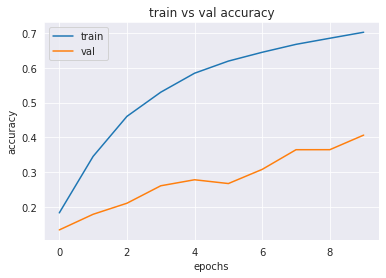

In [ ]:
plt.plot(history.history[ 'accuracy'])
plt.plot(history.history[ 'val_accuracy'])
plt.title( 'train vs val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend( ['train', 'val'])
plt.show()

## **MODEL 4**
## **3. Weight Initialization**
Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree.

## **4. Dropout**

In [ ]:
def mlp_model4():
    model = Sequential()

    model.add(Dense(1024, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(512, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(150, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
model = mlp_model4()
start = time.time()
history = model.fit(X_train, y_train,validation_data=(X_val,y_val),batch_size = 50, epochs = 10, verbose = 1)
end =  time.time()
duration = end - start
result = evaluate(model,X_test,y_test,duration)

out3 = pd.DataFrame({'model': ['NN with Dropout'], 'loss': [result[0]], 'accuracy': [result[1]]})

Epoch 1/10
840/840 [==============================] - 31s 35ms/step - loss: 2.1221 - accuracy: 0.2358 - val_loss: 183.9324 - val_accuracy: 0.1506
Epoch 2/10
840/840 [==============================] - 29s 35ms/step - loss: 1.4877 - accuracy: 0.4945 - val_loss: 97.9335 - val_accuracy: 0.3345
Epoch 3/10
840/840 [==============================] - 29s 34ms/step - loss: 1.2741 - accuracy: 0.5912 - val_loss: 72.2306 - val_accuracy: 0.4298
Epoch 4/10
840/840 [==============================] - 29s 34ms/step - loss: 1.1340 - accuracy: 0.6415 - val_loss: 47.1610 - val_accuracy: 0.4534
Epoch 5/10
840/840 [==============================] - 29s 34ms/step - loss: 1.0412 - accuracy: 0.6791 - val_loss: 30.9597 - val_accuracy: 0.5905
Epoch 6/10
840/840 [==============================] - 29s 35ms/step - loss: 0.9731 - accuracy: 0.7000 - val_loss: 19.8906 - val_accuracy: 0.5493
Epoch 7/10
840/840 [==============================] - 29s 35ms/step - loss: 0.9187 - accuracy: 0.7167 - val_loss: 27.1671 - val_a

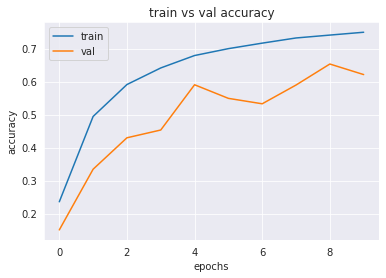

In [ ]:
plt.plot(history.history[ 'accuracy'])
plt.plot(history.history[ 'val_accuracy'])
plt.title( 'train vs val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend( ['train', 'val'])
plt.show()

### **MODEL 5**

Adding one more Hidden Layer

In [ ]:
def mlp_model5():
    model = Sequential()

    model.add(Dense(1024, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(512, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(150, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
model = mlp_model5()
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 50,epochs = 30, verbose = 1)
end =  time.time()
duration = end - start
result = evaluate(model,X_test,y_test,duration)

out4 = pd.DataFrame({'model': ['NN with DROPOUT-TUNED'], 'loss': [result[0]], 'accuracy': [result[1]]})

Epoch 1/30
840/840 [==============================] - 33s 36ms/step - loss: 2.2979 - accuracy: 0.1455 - val_loss: 97.1923 - val_accuracy: 0.0994
Epoch 2/30
840/840 [==============================] - 30s 36ms/step - loss: 1.8235 - accuracy: 0.3218 - val_loss: 54.1110 - val_accuracy: 0.2551
Epoch 3/30
840/840 [==============================] - 31s 37ms/step - loss: 1.5548 - accuracy: 0.4530 - val_loss: 29.1452 - val_accuracy: 0.4214
Epoch 4/30
840/840 [==============================] - 32s 38ms/step - loss: 1.3324 - accuracy: 0.5622 - val_loss: 74.6924 - val_accuracy: 0.4125
Epoch 5/30
840/840 [==============================] - 31s 37ms/step - loss: 1.2138 - accuracy: 0.6107 - val_loss: 68.6499 - val_accuracy: 0.3892
Epoch 6/30
840/840 [==============================] - 30s 36ms/step - loss: 1.1271 - accuracy: 0.6488 - val_loss: 27.5834 - val_accuracy: 0.5139
Epoch 7/30
840/840 [==============================] - 31s 37ms/step - loss: 1.0506 - accuracy: 0.6789 - val_loss: 23.1614 - val_ac

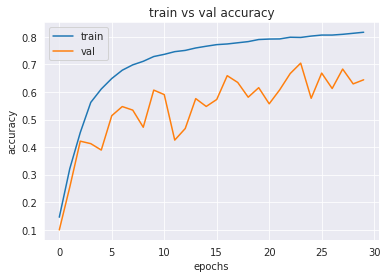

In [ ]:
plt.plot(history.history[ 'accuracy'])
plt.plot(history.history[ 'val_accuracy'])
plt.title( 'train vs val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend( ['train', 'val'])
plt.show()

### **MODEL 6**

Decreasing Learning Rate

In [ ]:
def mlp_model6():
    model = Sequential()

    model.add(Dense(1024, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(512, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(150, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))

    adam = optimizers.Adam(lr = 0.0001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
model = mlp_model6()
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 50,epochs = 50, verbose = 1)
end =  time.time()
duration = end - start
result = evaluate(model,X_test,y_test,duration)

out5 = pd.DataFrame({'model': ['NN with DROPOUT-HIDDEN'], 'loss': [result[0]], 'accuracy': [result[1]]})

Epoch 1/50
840/840 [==============================] - 33s 36ms/step - loss: 2.6747 - accuracy: 0.1085 - val_loss: 744.8178 - val_accuracy: 0.0984
Epoch 2/50
840/840 [==============================] - 30s 35ms/step - loss: 2.4459 - accuracy: 0.1255 - val_loss: 518.3564 - val_accuracy: 0.1078
Epoch 3/50
840/840 [==============================] - 30s 35ms/step - loss: 2.2692 - accuracy: 0.1690 - val_loss: 383.8746 - val_accuracy: 0.1042
Epoch 4/50
840/840 [==============================] - 30s 36ms/step - loss: 2.0602 - accuracy: 0.2386 - val_loss: 236.6990 - val_accuracy: 0.1323
Epoch 5/50
840/840 [==============================] - 31s 36ms/step - loss: 1.8823 - accuracy: 0.3073 - val_loss: 88.0874 - val_accuracy: 0.2366
Epoch 6/50
840/840 [==============================] - 30s 36ms/step - loss: 1.7395 - accuracy: 0.3735 - val_loss: 49.6083 - val_accuracy: 0.3208
Epoch 7/50
840/840 [==============================] - 30s 36ms/step - loss: 1.5930 - accuracy: 0.4373 - val_loss: 36.7053 - va

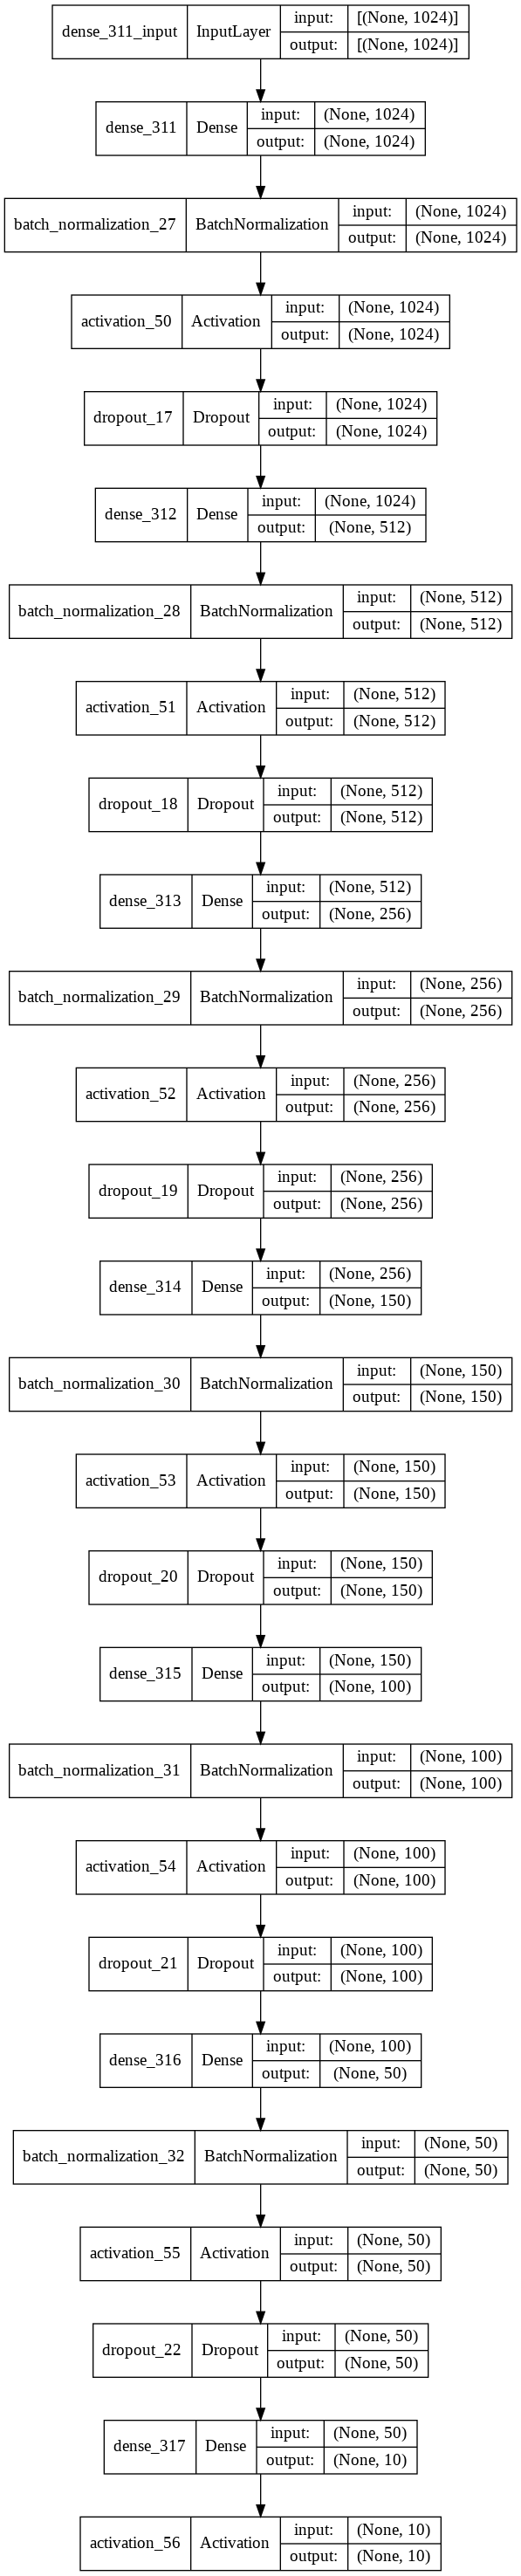

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

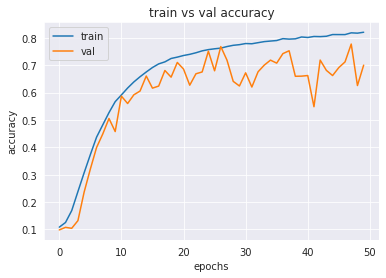

In [ ]:
plt.plot(history.history[ 'accuracy'])
plt.plot(history.history[ 'val_accuracy'])
plt.title( 'train vs val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend( ['train', 'val'])
plt.show()

### **Display and compare all the models designed with their loss and test accuracies.**

In [ ]:
SCORES = pd.concat([out,out1,out2,out3,out4,out5])

In [ ]:
SCORES

,model,loss,accuracy
0,NN with sgd,2.302751,0.095500
0,NN with relu,2.179280,0.286944
0,NN with BN,1.004346,0.696667
0,NN with Dropout,0.824288,0.740944
0,NN with DROPOUT-TUNED,0.663942,0.796944
0,NN with DROPOUT-HIDDEN,0.598051,0.812889


## **Use the best model to predict the data**

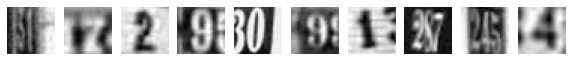

Image label: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('Image label: %s' % (y_test[0:10]))

In [ ]:
print(np.argmax(model.predict(X_test[30].reshape(1,1024))))

2


In [ ]:
plt.figure(figsize = (2,2))
plt.imshow(X_test[30].reshape(32,32), cmap = 'gray') #image, reshape size, cmap
plt.show()
print(np.argmax(model.predict(X_test[30].reshape(1,32,32,1))))

plt.figure(figsize = (2,2))
plt.imshow(X_test[50].reshape(32,32), cmap = 'gray')
plt.show()
print(np.argmax(model.predict(X_test[50].reshape(1,32,32,1))))

plt.figure(figsize = (2,2))
plt.imshow(X_test[100].reshape(32,32), cmap = 'gray') #image, reshape size, cmap
plt.show()
print(np.argmax(model.predict(X_test[100].reshape(1,32,32,1))))

plt.figure(figsize = (2,2))
plt.imshow(X_test[230].reshape(32,32), cmap = 'gray') #image, reshape size, cmap
plt.show()
print(np.argmaxml(model.predict(X_test[230].reshape(1,32,32,1))))

plt.figure(figsize = (2,2))
plt.imshow(X_test[1000].reshape(32,32), cmap = 'gray') #image, reshape size, cmap
plt.show()
print(np.argmax(model.predict(X_test[1000].reshape(1,32,32,1))))